In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
#2021 sales and profits 
data=pd.read_csv('analysis/sales_data_2021.csv')
DF_2021=pd.DataFrame(data)

data=pd.read_csv('analysis/sales_data_2022.csv')
DF_2022=pd.DataFrame(data)

data=pd.read_csv('analysis/sales_data_2023.csv')
DF_2023=pd.DataFrame(data)

data=pd.read_csv('analysis/sales_data_2024.csv')
DF_2024=pd.DataFrame(data)

sales_2021=pd.read_csv('analysis/sales_data_2021.csv')
sales_2022=pd.read_csv('analysis/sales_data_2022.csv')
sales_2023=pd.read_csv('analysis/sales_data_2023.csv')
sales_2024=pd.read_csv('analysis/sales_data_2024.csv')

DF_2021_2024=pd.concat([sales_2021,sales_2022,sales_2023,sales_2024])
DF_2021_2024=pd.DataFrame(DF_2021_2024)

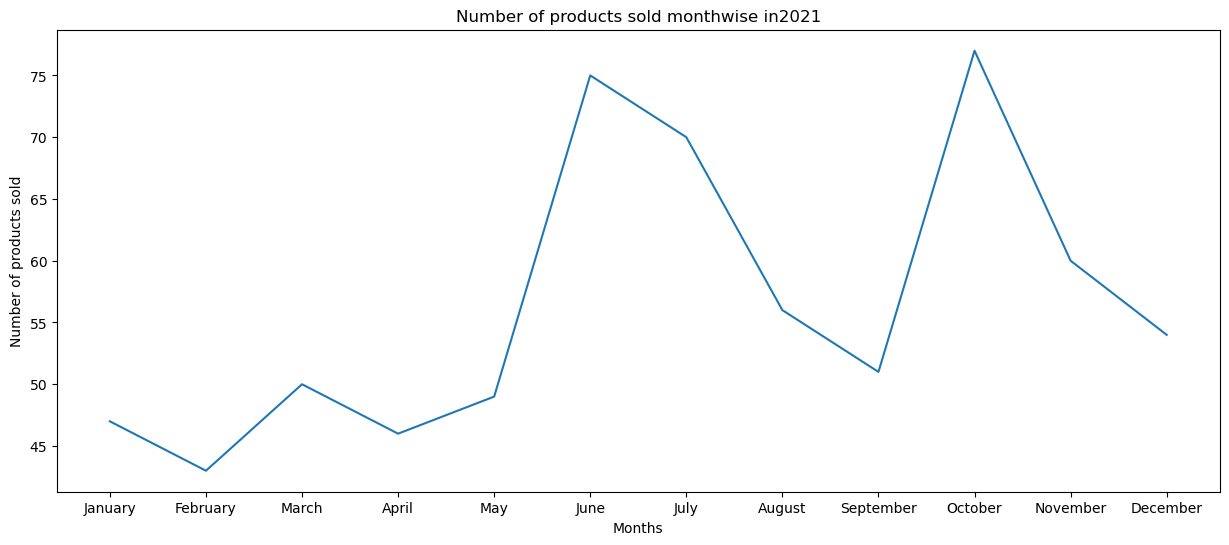

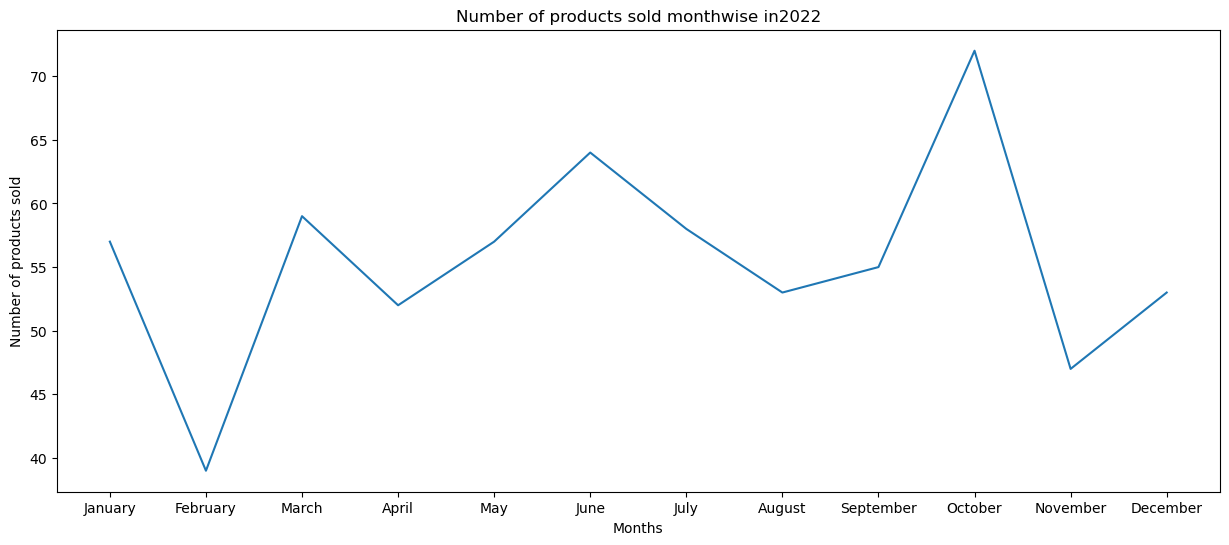

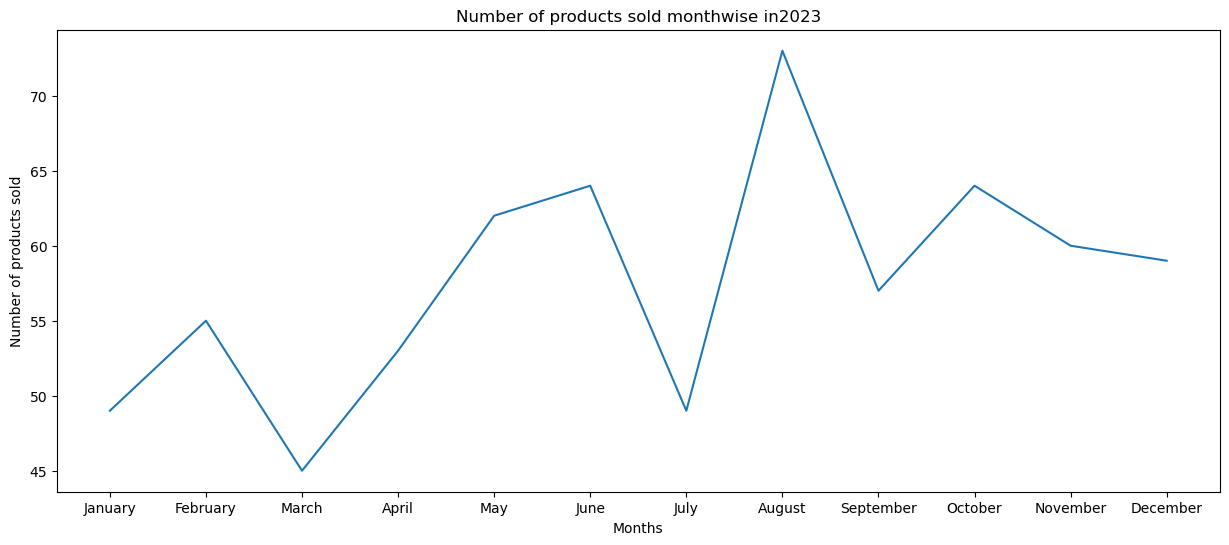

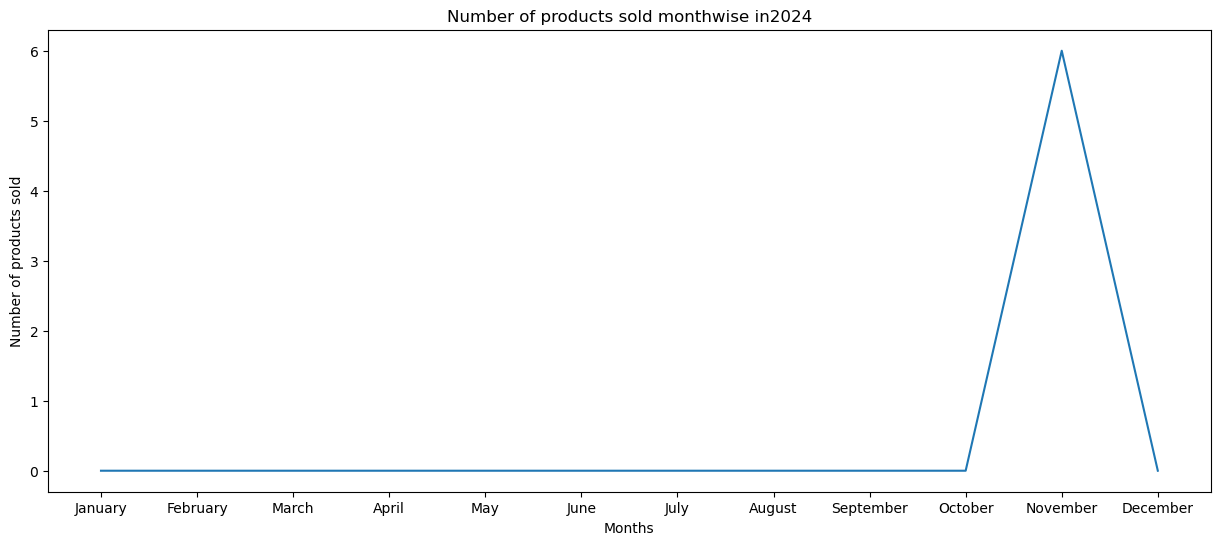

In [15]:
DF_2021_2024['date_time']=pd.to_datetime(DF_2021_2024['date_time'])
DF_2021_2024
months=['January','February','March','April','May','June','July','August','September','October','November','December']

#Loop for yearwise analysis of number of product sold in months
for i in range(2021,2025):
    temp_df=DF_2021_2024[DF_2021_2024['date_time'].dt.year==i]
    Sold_product_quantity=np.array([])
    for j in range(1,13):
        Sold_product_quantity=np.append(Sold_product_quantity,len(temp_df[temp_df['date_time'].dt.month == j]))
    #graph to show number of product sold monthwise
    plt.figure(figsize=(15,6))
    #in place of range put the name of the months
    plt.plot(months,Sold_product_quantity)
    plt.xlabel('Months')
    plt.ylabel('Number of products sold')
    plt.title(f'Number of products sold monthwise in{i}')


In [16]:
DF_2021_2024


,Unnamed: 0,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3
4,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,swaad achaar gosht masala 100 gm (70),2
...,...,...,...,...,...,...,...,...,...
1,0,6177,2024-11-24 17:47:54.366286+00:00,admin,riyan,300,Loan,NaN,0
2,1,6178,2024-11-24 18:22:10.571521+00:00,admin,khan,1116,Online,NaN,0
3,2,6422,2024-11-24 17:47:54.366286+00:00,admin,riyan,300,Loan,NaN,0
4,2,6422,2024-11-24 17:47:54.366286+00:00,admin,riyan,300,Loan,NaN,0


In [17]:
Unique_products=pd.DataFrame()
Unique_products['name']=DF_2021_2024['name'].unique()
Unique_products['date time']=0
Unique_products

,name,date time
0,pardis donga l 737,0
1,kofta (stc) 9s pack (1n),0
2,rlx t bursh expert plus soft(55),0
3,new robin liquid bleach 500 ml (04),0
4,swaad achaar gosht masala 100 gm (70),0
...,...,...
1805,sb classic spiral 1pcs pack (scotch brite matt...,0
1806,solec-ultra 500 gms detergent powder)(18),0
1807,anmol banaspati ghee 1 kg pch,0
1808,macroni salanti 400 gm (39),0


In [18]:
Main_data=pd.read_csv('analysis/Products.csv')
Main_data=pd.DataFrame(Main_data)
Main_data['name']=Main_data['name'].str.strip()
Main_data['name'] = Main_data['name'].str.lower()

#Cleaning the Data by removing the product whos 
#Product name is invalid
#Sale price is invalid
#Category is invalid
Main_data=Main_data[pd.to_numeric(Main_data['name'], errors='coerce').isna()]
Main_data=Main_data[Main_data['Sale Price']>1]
Main_data=Main_data[Main_data['Category'] != 'All / Old Code']
Main_data=Main_data[Main_data['Category'] != 'All']

In [19]:
#If the both have the same product name then merge it and form new dataset
Merged_data=pd.merge(DF_2021_2024,Main_data,on="name")

In [20]:
Merged_data


,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)"
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee


In [21]:

#Remove the columns which are not required
# Merged_data.drop(['sales_manager_id__admin_name'],axis=1,inplace=True)
# Merged_data.drop(['id'],axis=1,inplace=True)
# Merged_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:

Merged_data

,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)"
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee


In [23]:
#we have to divide the product on the base of sale price range 
# print(Merged_data[Merged_data['Sale Price']==2])
# print(Merged_data['Sale Price'].max())
# print(Merged_data[Merged_data['Sale Price']==11898.0])


#Product whose sale price is between 1 to 100 their profit margin is 5%, make new column in the data frame
def assign_profit_margin(price):
    if price <= 100:
        return 0.05  # 5%
    elif 100 < price <= 500:
        return 0.10  # 10%
    elif 500 < price <= 1000:
        return 0.15  # 15%
    elif 1000 < price <= 5000:
        return 0.20  # 20%
    elif 5000 < price <= 12000:
        return 0.30  # 30%

# Apply the function to create a new 'Profit Margin' column
Merged_data['Profit Margin'] = Merged_data['Sale Price'].apply(assign_profit_margin)


#Product whose sale price is between 100 to 500 their profit margin is 10%
#Product whose sale price is between 500 to 1000 their profit margin is 15%
#Product whose sale price is between 1000 to 5000 their profit margin is 20%
#Product whose sale price is between 5000 to 12000 their profit margin is 30%

Merged_data

,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category,Profit Margin
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils,0.15
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food,0.10
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes,0.10
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush,0.10
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)",0.05
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders,0.05
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders,0.10
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee,0.10


In [24]:
#Calculating cost price of each product 

Merged_data['Cost Price'] = Merged_data['Sale Price'] * (1 - Merged_data['Profit Margin'])
Merged_data

,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category,Profit Margin,Cost Price
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils,0.15,443.7
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food,0.10,343.8
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes,0.10,109.8
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush,0.10,404.1
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener,0.10,178.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)",0.05,28.5
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders,0.05,68.4
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders,0.10,129.6
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee,0.10,94.5


In [25]:
Merged_data['Cost Price'] = Merged_data['Sale Price'] * (1 - Merged_data['Profit Margin'])
Merged_data

,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category,Profit Margin,Cost Price
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils,0.15,443.7
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food,0.10,343.8
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes,0.10,109.8
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush,0.10,404.1
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener,0.10,178.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)",0.05,28.5
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders,0.05,68.4
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders,0.10,129.6
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee,0.10,94.5


In [26]:
#Add another column in which we have three different values loan, cash, online
Merged_data['payment_method']=np.random.choice(['loan', 'cash', 'online'], size=len(Merged_data))
Merged_data

,Unnamed: 0_x,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,transactions_id__transaction_type,name,quantity,Unnamed: 0_y,price,Sale Price,Category,Profit Margin,Cost Price,payment_method
0,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,pardis donga l 737,2,1429,615,522,Plastic Items House Hold Utensils,0.15,443.7,cash
1,0,6889,2021-12-31 19:36:17.791877+00:00,admin,sabir,2505,Loan,kofta (stc) 9s pack (1n),3,598,425,382,Frozen Food,0.10,343.8,loan
2,1,6888,2021-12-31 08:06:21.684152+00:00,admin,asfand yar,136,Online,rlx t bursh expert plus soft(55),1,182,136,122,Tooth Brushes,0.10,109.8,loan
3,2,6887,2021-12-30 20:34:48.222955+00:00,admin,sajid,1951,Loan,new robin liquid bleach 500 ml (04),3,1860,499,449,Shoes Polish/Shoes Brush,0.10,404.1,cash
4,3,6886,2021-12-28 20:55:59.030293+00:00,admin,yahya,812,Online,dove body spry 150 ml,2,877,220,198,Spray Perfumes Air Freshener,0.10,178.2,cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,483,7356,2023-01-06 13:25:45.942736+00:00,admin,asaf,354,Loan,fruitien guava necter 200 ml,2,780,32,30,"Beverages (Soft drink, Water, Juices, Syrups etc)",0.05,28.5,cash
1750,484,7355,2023-01-04 15:51:28.665705+00:00,admin,waqas,152,Loan,sb classic spiral 1pcs pack (scotch brite matt...,2,864,76,72,Detergents Washing Powders,0.05,68.4,online
1751,485,7354,2023-01-04 13:48:56.236305+00:00,admin,abbas,525,Cash,solec-ultra 500 gms detergent powder)(18),2,858,160,144,Detergents Washing Powders,0.10,129.6,loan
1752,486,7353,2023-01-01 20:06:21.195240+00:00,admin,asaf,117,Loan,anmol banaspati ghee 1 kg pch,1,446,117,105,Ghee,0.10,94.5,online


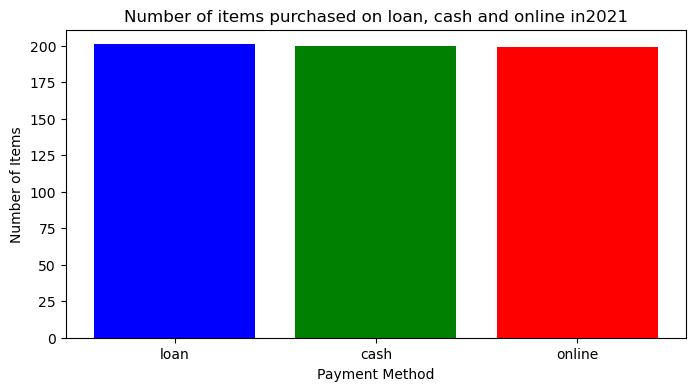

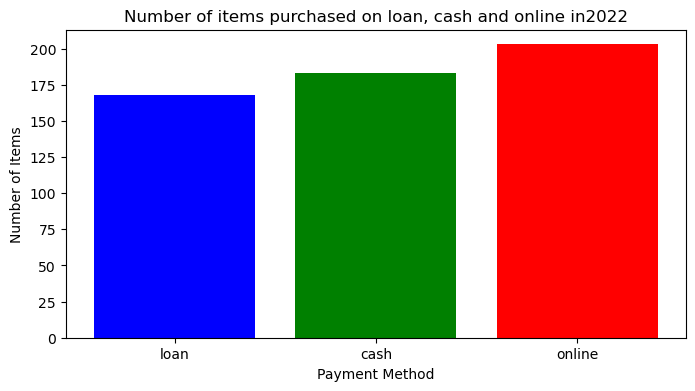

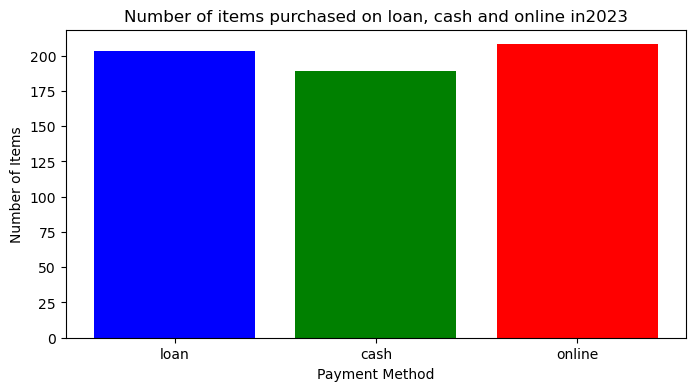

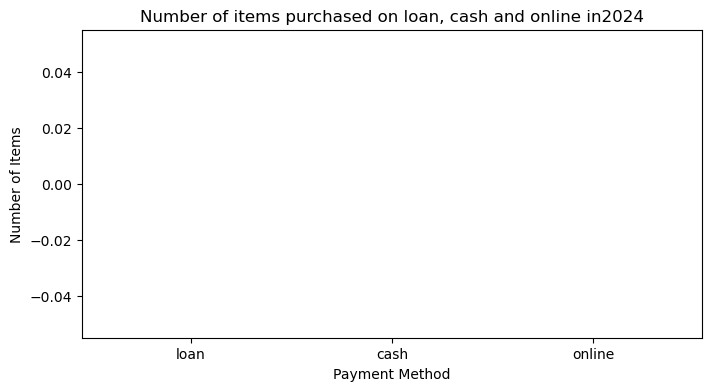

In [27]:
#Yearwise how much items are purchased on loan, cash and online 
months=['January','February','March','April','May','June','July','August','September','October','November','December']

for i in range(2021,2025):
    temp_df=Merged_data[Merged_data['date_time'].dt.year==i]
    loan=len(temp_df[temp_df['payment_method'] == 'loan'])
    cash=len(temp_df[temp_df['payment_method'] == 'cash'])
    online=len(temp_df[temp_df['payment_method'] == 'online'])
    #Number of items purchased on loan, cash and online 
    plt.figure(figsize=(8,4))
    plt.bar(['loan','cash','online'],[loan,cash,online],color=['blue','green','red'])
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Items')
    plt.title(f'Number of items purchased on loan, cash and online in{i}')
    plt.show()
        
    

In [28]:
#Profit from each product
import csv
Merged_data['Profit'] = Merged_data['Sale Price'] - Merged_data['Cost Price']
Merged_data
#Save the dataset
Merged_data.to_csv('Merged_data.csv', index=False)

In [29]:

#

In [30]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

       Unnamed: 0           id  transactions_id__total_amount  name  quantity
count    6.000000     6.000000                       6.000000   0.0       6.0
mean     1.333333  6299.833333                     572.000000   NaN       0.0
std      1.211060   134.193020                     421.380588   NaN       0.0
min      0.000000  6177.000000                     300.000000   NaN       0.0
25%      0.250000  6177.250000                     300.000000   NaN       0.0
50%      1.500000  6300.000000                     300.000000   NaN       0.0
75%      2.000000  6422.000000                     912.000000   NaN       0.0
max      3.000000  6423.000000                    1116.000000   NaN       0.0


In [31]:
Merged_data['date_time'] = pd.to_datetime(Merged_data['date_time'], errors='coerce')

# Check for any rows that couldn't be converted
print(Merged_data[Merged_data['date_time'].isnull()])

Empty DataFrame
Columns: [Unnamed: 0_x, id, date_time, sales_manager_id__admin_name, user_id__customer_name, transactions_id__total_amount, transactions_id__transaction_type, name, quantity, Unnamed: 0_y, price, Sale Price, Category, Profit Margin, Cost Price, payment_method, Profit]
Index: []


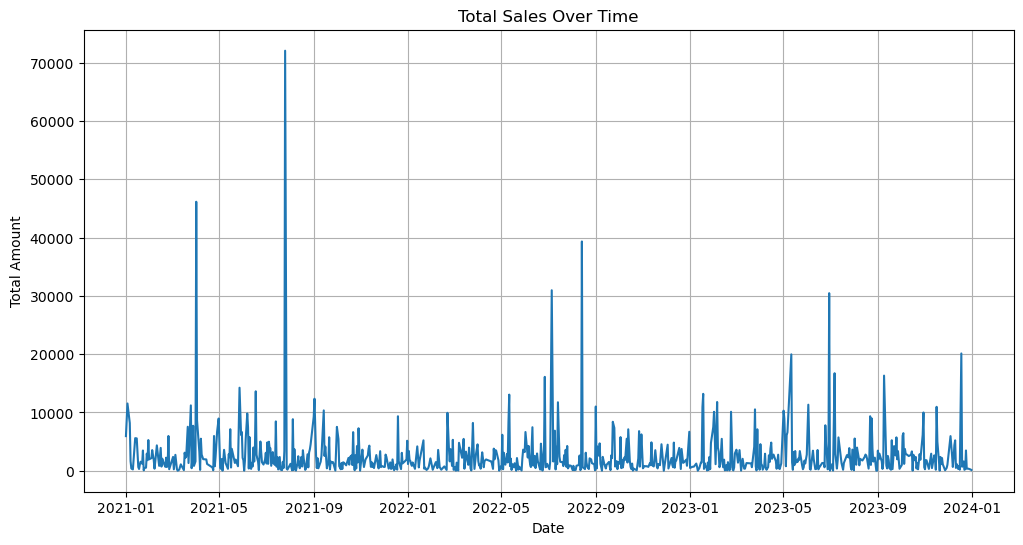

In [32]:
sales_over_time = Merged_data.groupby(Merged_data['date_time'].dt.date)['transactions_id__total_amount'].sum()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid()
plt.show()

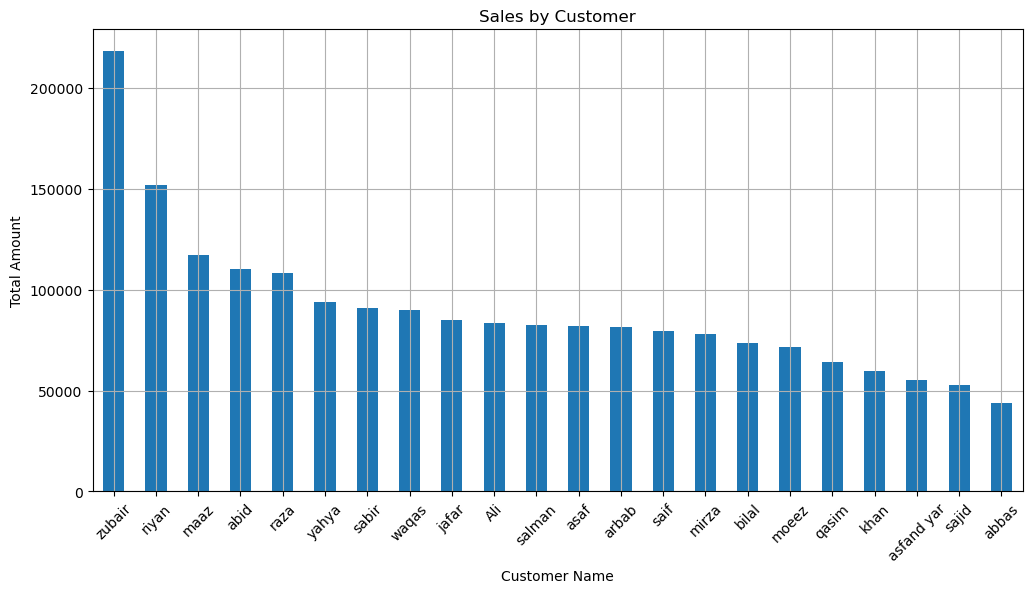

In [33]:
# Group by customer name and sum the total amount
sales_by_customer = Merged_data.groupby('user_id__customer_name')['transactions_id__total_amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sales_by_customer.plot(kind='bar')
plt.title('Sales by Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

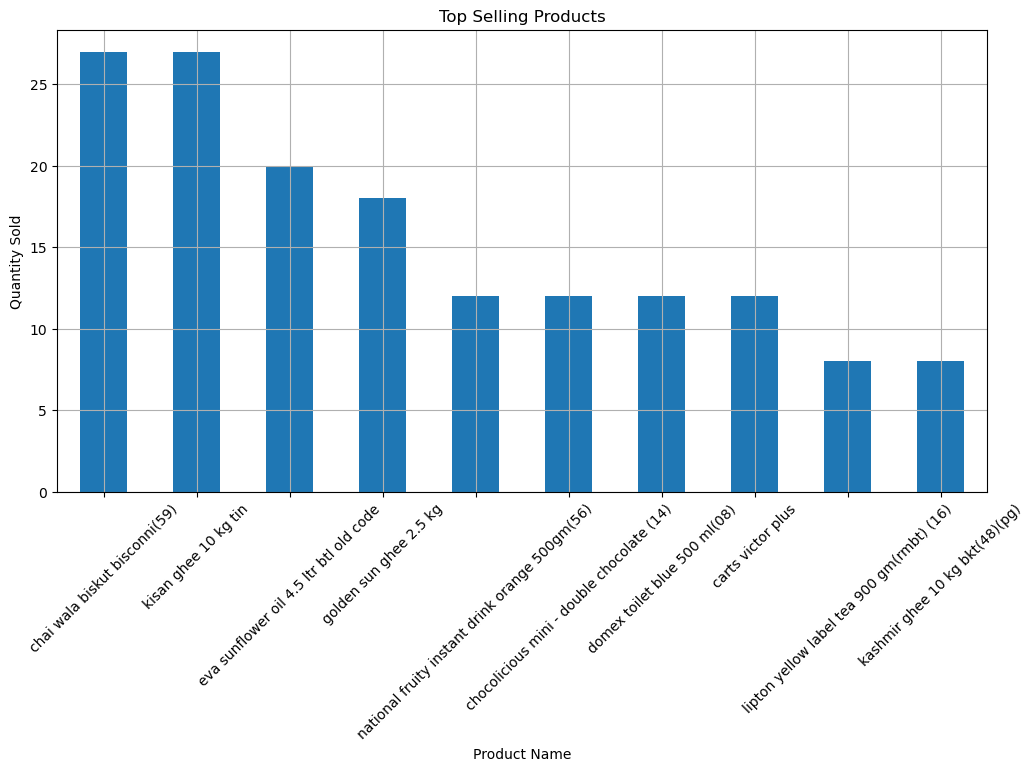

In [34]:
# Group by product name and sum the quantity
top_selling_products = Merged_data.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

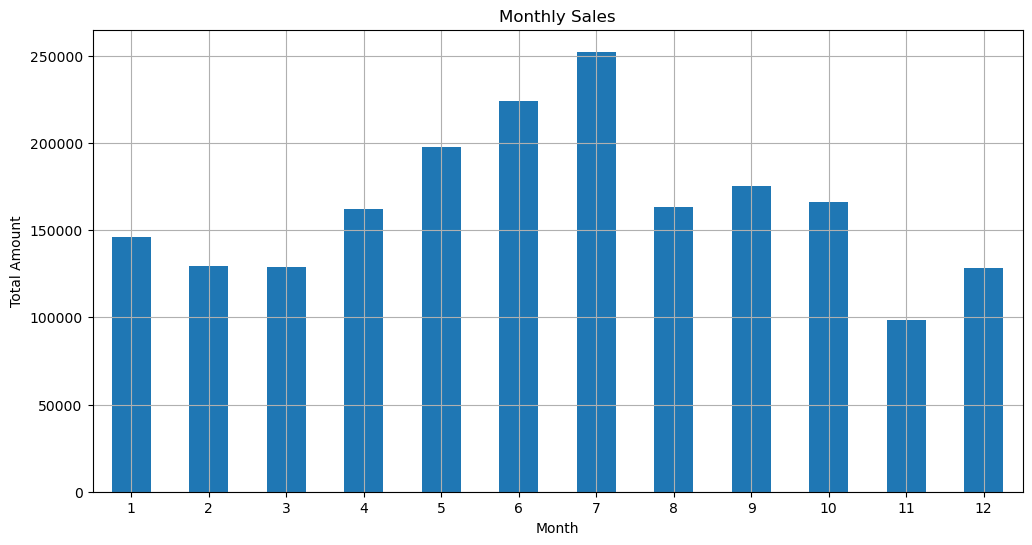

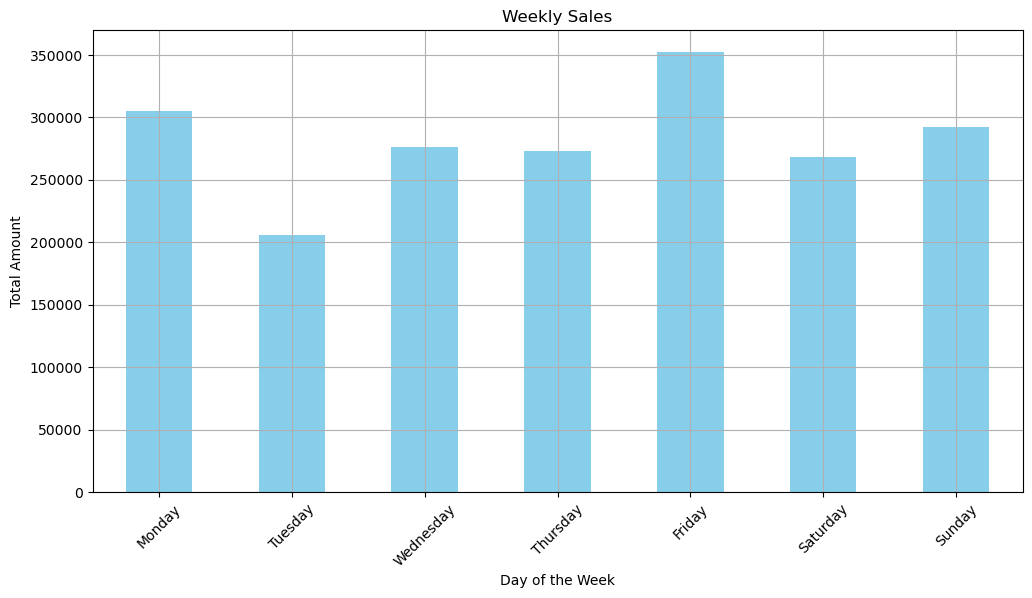

In [35]:
# Extract month and day of week
Merged_data['month'] = Merged_data['date_time'].dt.month
Merged_data['day_of_week'] = Merged_data['date_time'].dt.day_name()

# Group by month and sum the total amount
monthly_sales = Merged_data.groupby('month')['transactions_id__total_amount'].sum()

# Plotting monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.grid()
plt.show()

# Group by day of week and sum the total amount
weekly_sales = Merged_data.groupby('day_of_week')['transactions_id__total_amount'].sum()

# Reorder days for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)



# Plotting weekly sales
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Weekly Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()